In [2]:
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

%matplotlib inline
data = pd.read_csv('normalized_data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,...,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312
1,842517,0,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,...,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943
2,84300903,0,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,...,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214
3,84348301,0,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,...,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672
4,84358402,0,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,...,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751


In [4]:
y=data.iloc[:,1]
X=data.iloc[:,2:]

#print(X)
print(y)



0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [6]:
l = LDA()
#l.fit_normal_dist(X,y)
l.fit_transform(X, y)
print(f'Accuracy is: {l.evaluate(X, y)}')

Accuracy is: 0.9771528998242531


In [7]:
print(f'The discriminant vector in 1-D is {l.t} a single point.') # this is the discriminant vector(a single point) in 1-D

The discriminant vector in 1-D is 0.04076801402697723 a single point.


In [8]:
def normal_pdf(x, mu, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((x - mu)**2) / var)

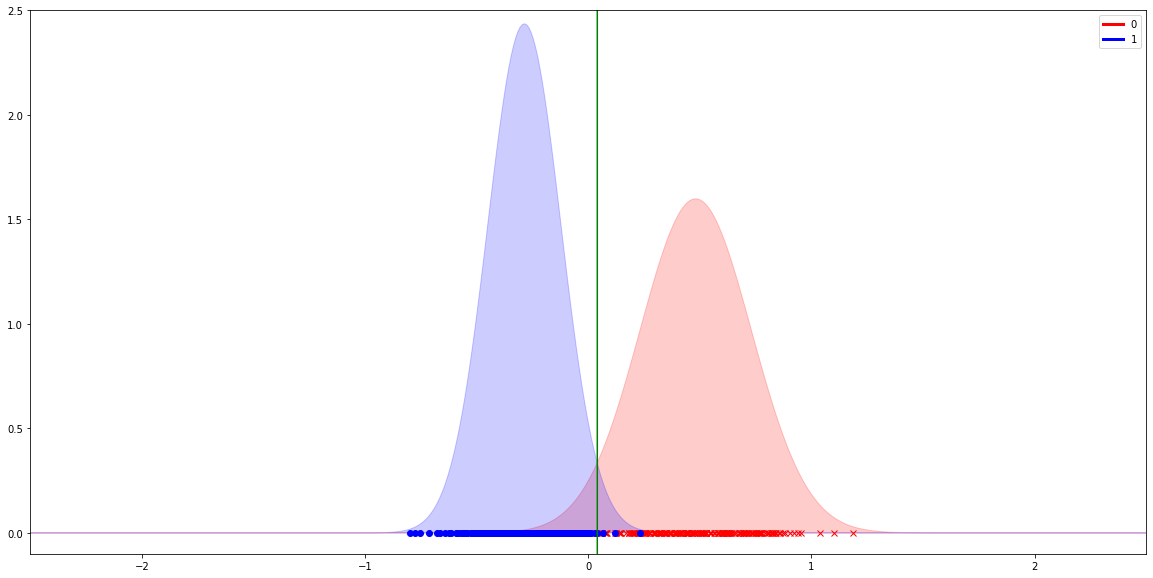

In [9]:
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(20, 10))
plt.ylim(-.1, 2.5)
plt.xlim(-2.5, 2.5)

lines = [Line2D([0], [0], color='red', linewidth=3, linestyle='-'),
        Line2D([0], [0], color='blue', linewidth=3, linestyle='-')]
labels = ['0', '1']
plt.legend(lines, labels)

plt.plot(l.X_transformed0, np.zeros_like(l.X_transformed0), 'x', color='red')
plt.plot(l.X_transformed1, np.zeros_like(l.X_transformed1), 'o', color='blue')
x_plot = np.linspace(-50, 50, 10000)
y_0 = normal_pdf(x_plot, np.mean(l.X_transformed0), np.var(l.X_transformed0))
y_1 = normal_pdf(x_plot, np.mean(l.X_transformed1), np.var(l.X_transformed1))
plt.fill_between(x_plot, y_0, color='red', alpha=0.2)
plt.fill_between(x_plot, y_1, color='blue', alpha=0.2)
plt.plot([l.t for x in x_plot], x_plot, color='green')